# Image Augmentations

Image Augumentations help CNN, models to learn better and wider range and also it can solve data amount issue to some extent 
- Images are rotated slightly
- Images are zoomed in/out (scaled)
- Some amount of noise is present in the image
- Images have low brightness
- Images have been flipped
- Images have been sheared (one side of the image is more twisted)

### Import Libraries / Data

In [2]:
from torchvision import datasets
import torch
data_folder = 'data/' # This can be any directory
# you download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, \
train=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Load data

In [3]:
tr_images = fmnist.data
tr_targets = fmnist.targets

Plot data

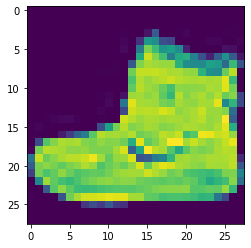

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(tr_images[0])

## Augumentations

In [5]:
from imgaug import augmenters as iaa
aug = iaa.Affine(scale=2)

Text(0.5, 1.0, 'Scaled image')

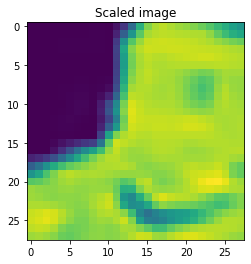

In [6]:
plt.imshow(aug.augment_image(tr_images[0]))
plt.title('Scaled image')

Text(0.5, 1.0, 'rotated image')

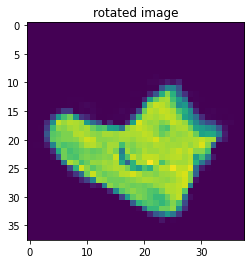

In [8]:
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]))
plt.title('rotated image')

Text(0.5, 1.0, 'shifted image')

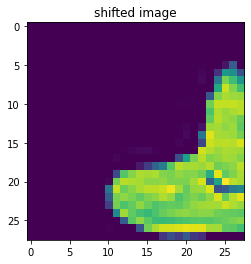

In [16]:
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=False)
plt.imshow(aug.augment_image(tr_images[0]))
plt.title('shifted image')

Text(0.5, 1.0, 'shear image')

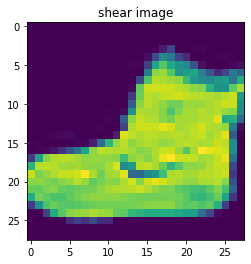

In [22]:
aug = iaa.Affine(shear=10, fit_output=False)
plt.imshow(aug.augment_image(tr_images[0]))
plt.title('shear image')

Text(0.5, 1.0, 'low brightness image')

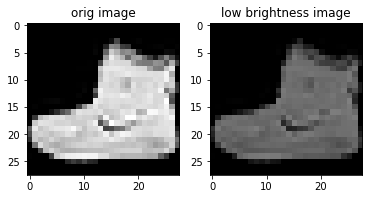

In [26]:
# changing brightness
plt.subplot(1,2,1)
aug = iaa.Multiply(1)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray', vmin = 0, vmax = 255)
plt.title('orig image')

plt.subplot(1,2,2)
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray', vmin = 0, vmax = 255)
plt.title('low brightness image')

Text(0.5, 1.0, 'blured image')

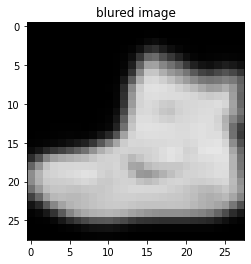

In [27]:
# GaussianBlur to the image 
aug = iaa.GaussianBlur(sigma=0.8)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray', vmin = 0, vmax = 255)
plt.title('blured image')

Text(0.5, 1.0, 'noised image')

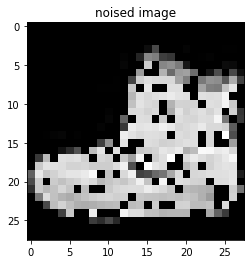

In [29]:
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray', vmin = 0, vmax = 255)
plt.title('noised image (random dropouts)')

Text(0.5, 1.0, 'noised image (salt pepper noise) basically add all kinds of pixels')

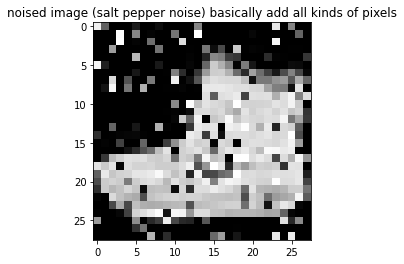

In [31]:
aug = iaa.SaltAndPepper(p=0.2)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray', vmin = 0, vmax = 255)
plt.title('noised image (salt pepper noise) basically add all kinds of pixels')

### Sequence of Augumentations in Data loaders

In [32]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
  iaa.Affine(translate_px={'x':(-10,10)},
  mode='constant'),
  iaa.Multiply(0.7),
])

In [33]:
# integrating augumentation with images
device = 'cpu'

from torch.utils.data import Dataset, DataLoader
class FMNISTDataset(Dataset):
  def __init__(self, x, y, aug=None):
    self.x, self.y = x, y
    self.aug = aug

  def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x, y
    
  def __len__(self): return len(self.x)

  def collate_fn(self, batch):
    ims, classes = list(zip(*batch))
    if self.aug: ims=self.aug.augment_images(images=ims)
    ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
    classes = torch.tensor(classes).to(device)
    return ims, classes


In [34]:
train = FMNISTDataset(tr_images, tr_targets, aug=aug)
trn_dl = DataLoader(train, batch_size=64, collate_fn=train.collate_fn,shuffle=True)